# Climate of South America


### Physics of Climate System WS 2016/17 Final Project
### Authors: Philipp Gregor, Florian Herla, Phadtaya Poemnamthip


## 0. Personal Contribution

## 1. Introduction

South America... (to be continued)

In [1]:
# Display the plots in the notebook:
%matplotlib inline
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are to ignore certain warnings.
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [9]:
plt.rcParams['figure.figsize'] = (9, 7)

In [8]:
my_extents = [-100, -30, 20, -60]    # extents for map zoom; use when using contourf!

In [2]:
ds = xr.open_dataset('../ERA-Int-Invariant.nc')

# # South-America
netcdf = ds.sel(latitude=slice(20, -60), longitude=slice(-100, -30))
plt.rcParams['figure.figsize'] = (9, 7)

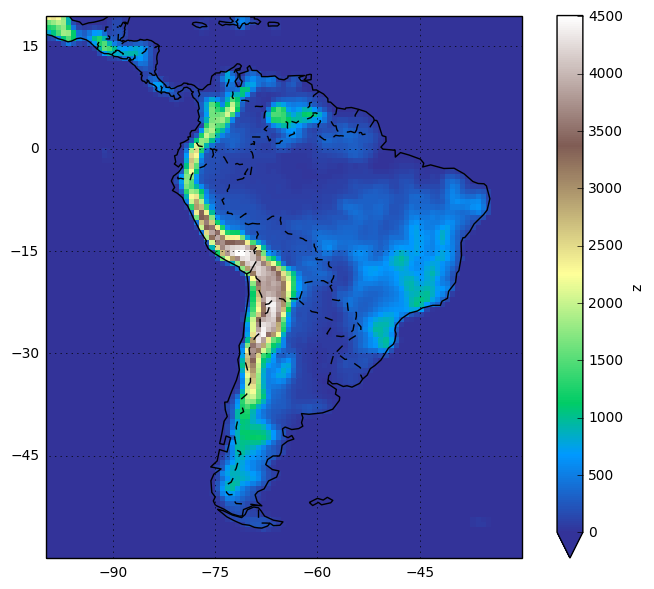

In [5]:
z = netcdf.z / 9.81

ax = plt.axes(projection=ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

## 2. Climate of South America: Basic features

### 2.1 Temperature

In [6]:
ncdf_t2m = xr.open_dataset('data/ERA-Int-Monthly-2mTemp.nc')
ds_t2m = ncdf_t2m.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

t2m = ds_t2m.t2m - 273.15     # °C
t2m_monthly=t2m.groupby('time.month').mean(dim='time')    # calculate monthly mean

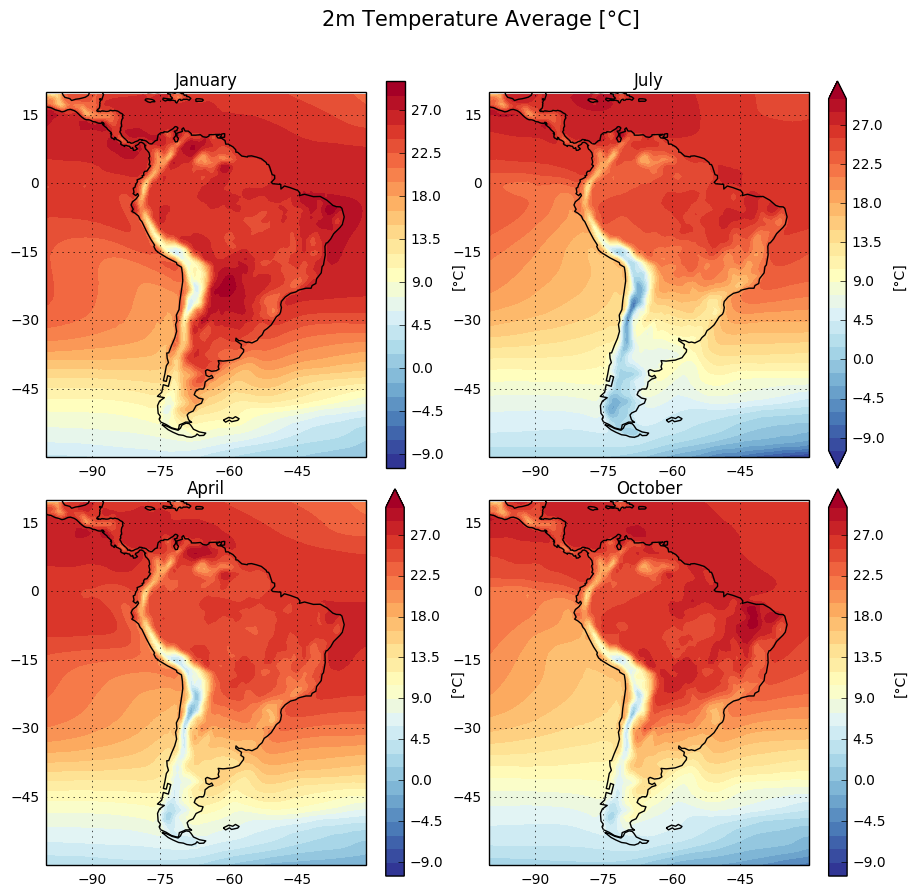

In [10]:
plt.figure(figsize=(9, 9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('January')
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=4).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('April')
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=7).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('July')
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
im = t2m_monthly.sel(month=10).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('October')
plt.tight_layout();
plt.suptitle('2m Temperature Average [°C]',fontsize=15)
plt.subplots_adjust(top=0.9)

### 2.2 Precipitation

### 2.3 Sea level pressure

Read data for Sea Level Pressure:

In [20]:
ncdf_slp = xr.open_dataset('data/ERA-Int-MonthlyAvg-UVSLP.nc')
ds_slp = ncdf_slp.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

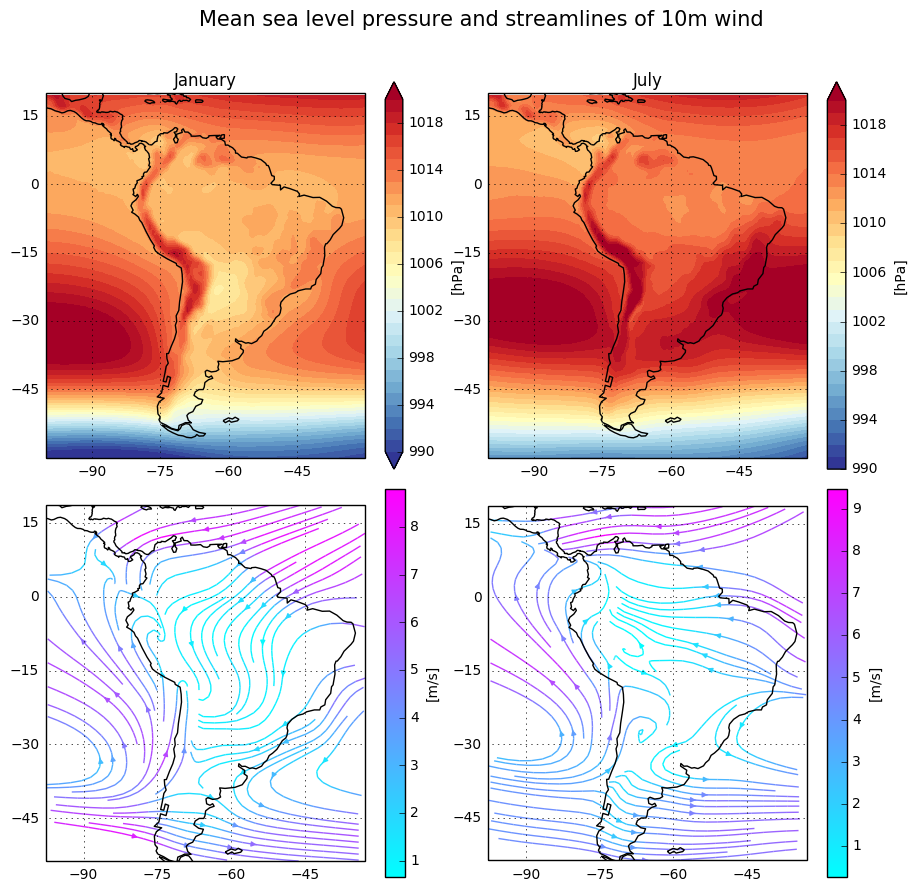

In [19]:
pu_jan, pv_jan = ds_slp.u10.sel(month=1)[::9,::9], ds_slp.v10.sel(month=1)[::9,::9]
pu_jul, pv_jul = ds_slp.u10.sel(month=7)[::9,::9], ds_slp.v10.sel(month=7)[::9,::9]

ws_jan = (pu_jan**2 + pv_jan**2)**0.5
ws_jul = (pu_jul**2 + pv_jul**2)**0.5

msl_jan = ds_slp.msl.sel(month=1) / 100   # [hPa]
msl_jul = ds_slp.msl.sel(month=7) / 100   # [hPa]

plt.figure(figsize=(9, 9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = msl_jan.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=990,vmax=1020,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[hPa]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('January')
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
strm = ax.streamplot(pu_jan.longitude, pu_jan.latitude, pu_jan.values, pv_jan.values, transform=ccrs.PlateCarree(),density=5, color=ws_jan.values, cmap=plt.get_cmap('cool'))
plt.colorbar(strm.lines,label='[m/s]')
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False


ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = msl_jul.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=990,vmax=1020,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[hPa]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('July')
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
strm = ax.streamplot(pu_jul.longitude, pu_jul.latitude, pu_jul.values, pv_jul.values, transform=ccrs.PlateCarree(),density=5, color=ws_jul.values, cmap=plt.get_cmap('cool'))
plt.colorbar(strm.lines,label='[m/s]')
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
plt.suptitle('Mean sea level pressure and streamlines of 10m wind',fontsize=15)
plt.tight_layout();
plt.subplots_adjust(top=0.9)

### 2.4 Surface wind

In [158]:
ncdf = xr.open_dataset('data/ERA-Int-MonthlyAvg-4D-TUVWZ.nc')

### 2.5 Regional climate

### 2.6 The Altiplano sub-region

The Altiplano sub-region is an area of highland located on the widening part of the Andes which ranges from latitude around 15°S to 22°S. (Garreud et al., 2003) (See fig. Al_1) Its average temperature in January (austral summer) is about 10°C - 15°C and about -5°C - 5°C in July (austral winter). In comparison with other regions in the same latitude, this semi-arid region has average temperature about 10°C lower (See fig. Al_2) dues to its elevation.

The average annual precipitation of Altiplano region has a strong gradient at the rim of the Andes. From fig. Al_3, slope areas on the eastern side of the region have average annual precipitation more than 3000 mm/yr, while around the center of plateau the average annual precipitation values are between 50 - 200 mm/yr. Furthermore, most precipitation occur during austral summer, while other seasons are relatively dry. (See fig. xx.) 

In fig. xx, intra-annual standard deviation and coefficient of variation of monthly averaged precipitation are presented. In the upper figure, it is obvious that the standard deviation is high at the eastern side of Altiplano, dues to high mean precipitation value. On the other hand, the coefficient of variation plot tells that the intra-annual variability of precipitation of Altiplano sub-region is relatively high.

In consistent to high precipitation along the eastern side of the region during summer time, fig. xx also shows that the mean wind flow at 950 hPa impacts the Andes at northeastern and southeastern part of Altiplano. Likewise, the moisture convection by the wind to these two areas result in the highest average precipitation in the sub-region.

Moreover, Garreaud et al., 2003 stated that summer rainfall in Altiplano region is caused by deep convection of moist air and background mean easterly flow. The confirmation of this statement will be reconstructed in the atmospheric cross-section section.

In [102]:
dsal = ncdf.sel(latitude=slice(-12, -30), longitude=slice(-75, -60)) #Slice data for Altiplano
dsal_t2m = ncdf_t2m.sel(latitude=slice(-12, -30), longitude=slice(-75, -60))

In [23]:
my_extents_al = [-75, -60, -12, -30]

z = netcdf.z / 9.81
z = z.where(netcdf.lsm == 1)

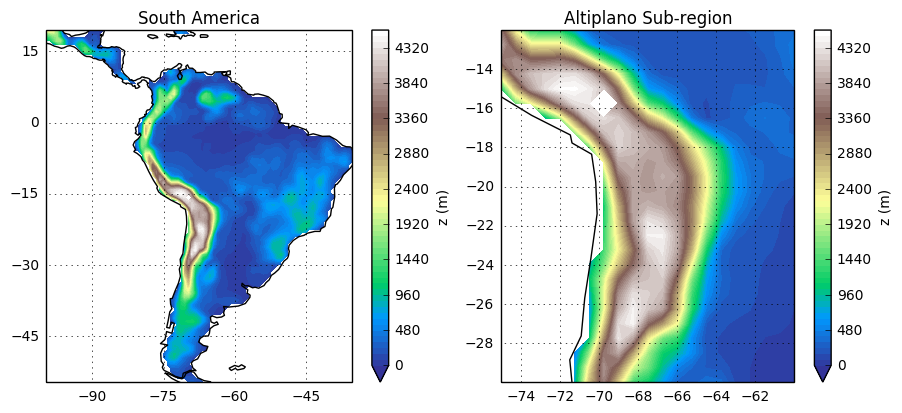

In [27]:
plt.figure(figsize=(9,4))
ax = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
im = z.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain',levels=60,cbar_kwargs={'label':'z (m)'}) 
ax.coastlines();  
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
plt.title('South America');
ax = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
im = z.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain',levels=60,cbar_kwargs={'label':'z (m)'}) 
ax.coastlines();  
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('Altiplano Sub-region');
plt.tight_layout();
#plt.suptitle('xyz',fontsize=15)
#plt.subplots_adjust(top=0.95)

Fig. Al_1. (Left) A map of South America showing its geographical height extracted from geopotential height. (Right) The zoomed-in map of geographical height of the Altiplano region which located in the Andes mountain range at about 3700 m above mean sea level.

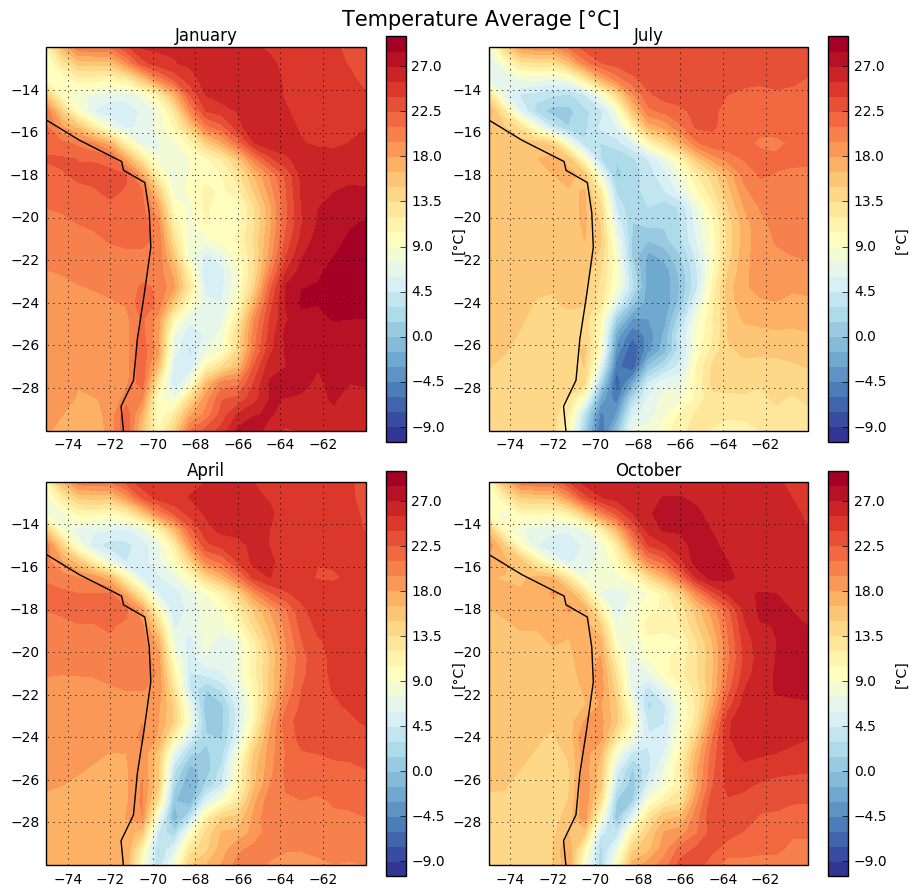

In [26]:
t2m_al = dsal_t2m.t2m - 273.15     # °C
t2m_al_monthly = t2m_al.groupby('time.month').mean(dim='time')    # calculate monthly mean


plt.figure(figsize=(9, 9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = t2m_al_monthly.sel(month=1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('January')
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
im = t2m_al_monthly.sel(month=4).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('April')
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = t2m_al_monthly.sel(month=7).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('July')
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
im = t2m_al_monthly.sel(month=10).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-10,vmax=30,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[°C]'})
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('October')
plt.tight_layout();
plt.suptitle('Temperature Average [°C]',fontsize=15)
plt.subplots_adjust(top=0.95)

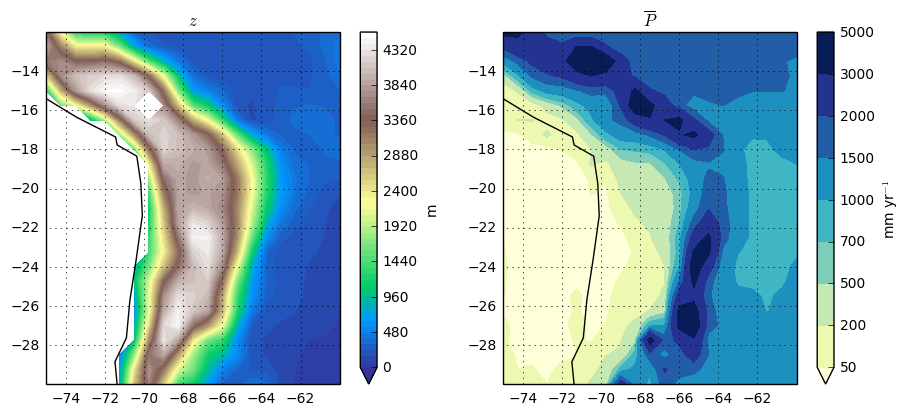

In [28]:
ncdf_prec = xr.open_dataset('data/ERA-Int-Monthly-P.nc')
ds_prec_al = ncdf_prec.sel(latitude=slice(-12, -30), longitude=slice(-75, -60))

annual_prec_al = ds_prec_al.tp.mean(dim='time') * 365.25 # Compute the average annual precipitation for every spatial point in the ds



plt.figure(figsize=(9,4))

ax = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
im = z.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain',levels=60,cbar_kwargs={'label':'m'}) 
ax.coastlines();  
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
ax.set_title('$z$');
plt.tight_layout();

ax = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
im = annual_prec_al.plot.contourf(ax=ax, levels=[50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000], transform=ccrs.PlateCarree(),cmap='YlGnBu',cbar_kwargs={'label':'mm yr$^{-1}$'})
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False;
ax.set_title('$\overline{P}$');

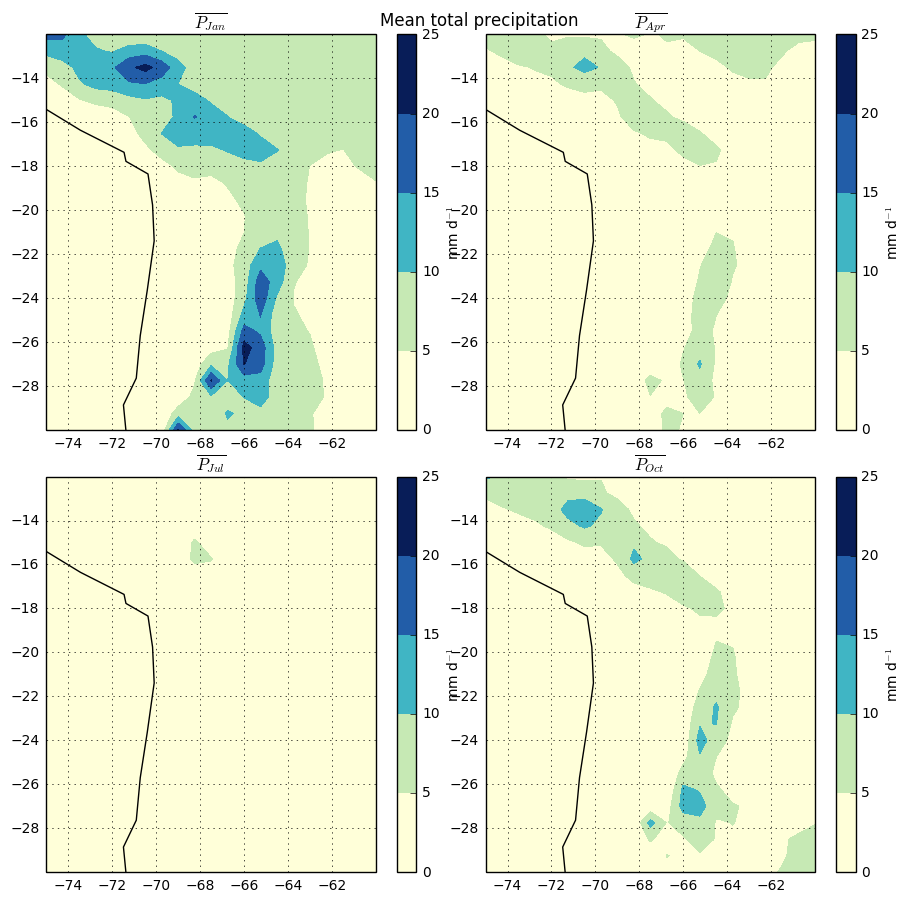

In [92]:
#group and average precipitation by months
prec_cycle_al = ds_prec_al.tp.groupby('time.month').mean(dim='time')

prec_jan_al = prec_cycle_al.sel(month=1)
prec_apr_al =  prec_cycle_al.sel(month=4)
prec_oct_al =  prec_cycle_al.sel(month=10)
prec_jul_al =  prec_cycle_al.sel(month=7)

#needed later on for rezooming the plot (fixing a bug with autozoom when setting levels)
my_extents_al = [prec_jan_al.longitude[0], prec_jan_al.longitude[-1], prec_jan_al.latitude[0], prec_jan_al.latitude[-1]]
my_levels_al = np.arange(0, 30, 5)

plt.figure(figsize=(9,9))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
prec_jan_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', cbar_kwargs={'label':'mm d$^{-1}$'}, levels=my_levels_al)
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
#ax.cbar_kwargs()
#ax.colorbar(ticks=levels)
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('$\overline{P_{Jan}}$')

ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
prec_apr_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', cbar_kwargs={'label':'mm d$^{-1}$'}, levels=my_levels_al)
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('$\overline{P_{Apr}}$')

ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
prec_jul_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', cbar_kwargs={'label':'mm d$^{-1}$'}, levels=my_levels_al)
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('$\overline{P_{Jul}}$')

ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
prec_oct_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', cbar_kwargs={'label':'mm d$^{-1}$'}, levels=my_levels_al)
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
ax.coastlines();
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('$\overline{P_{Oct}}$')

plt.suptitle('Mean total precipitation', fontsize=12)
plt.subplots_adjust(top=0.85)
plt.tight_layout()

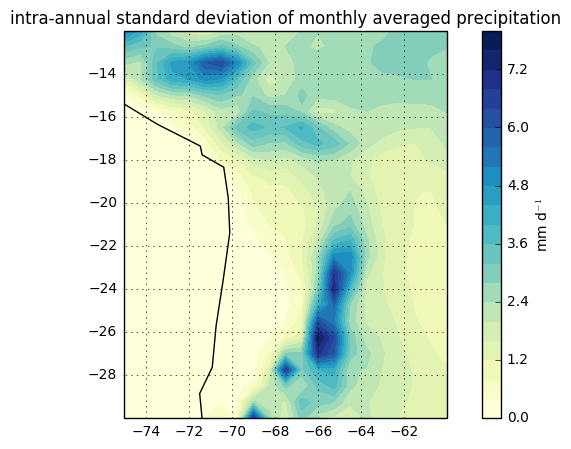

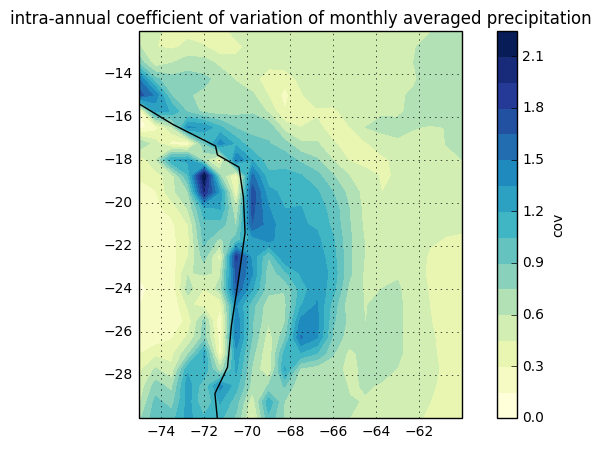

In [155]:
#Coefficient of variation and std in annual cycle:
intra_annual_prec_std_al = prec_cycle_al.std(dim='month')
intra_annual_prec_cv_al = intra_annual_prec_std_al / prec_cycle_al.mean(dim='month')

plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
intra_annual_prec_std_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', cbar_kwargs={'label':'mm d$^{-1}$'}, levels=20)
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
#ax.cbar_kwargs()
#ax.colorbar(ticks=levels)
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('intra-annual standard deviation of monthly averaged precipitation')

plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
intra_annual_prec_cv_al.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='YlGnBu', levels=20, cbar_kwargs={'label':'cov'})
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False;
xl.ylabels_right = False
plt.title('intra-annual coefficient of variation of monthly averaged precipitation');

In [93]:
Z = dsal.z / 9.81

#January
u_jan_low_al = dsal.u.sel(month=1).sel(level=950)    
v_jan_low_al = dsal.v.sel(month=1).sel(level=950)
pu_jan_low_al, pv_jan_low_al = u_jan_low_al[::3,::3], v_jan_low_al[::3,::3] 


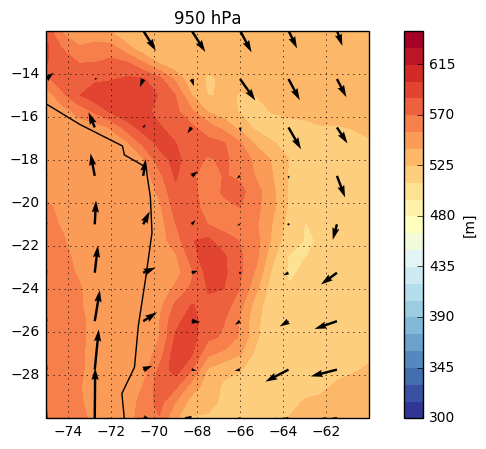

In [101]:
plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
Z.sel(month=1).sel(level=950).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_low_al.longitude, pu_jan_low_al.latitude, pu_jan_low_al, pv_jan_low_al, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents_al, crs=ccrs.PlateCarree())
plt.title('950 hPa');

## 3. Atmospheric drivers

### 3.1 Atmospheric circulation

Read and select data:

In [12]:

ds = ncdf.sel(latitude=slice(20, -60), longitude=slice(-100, -30))

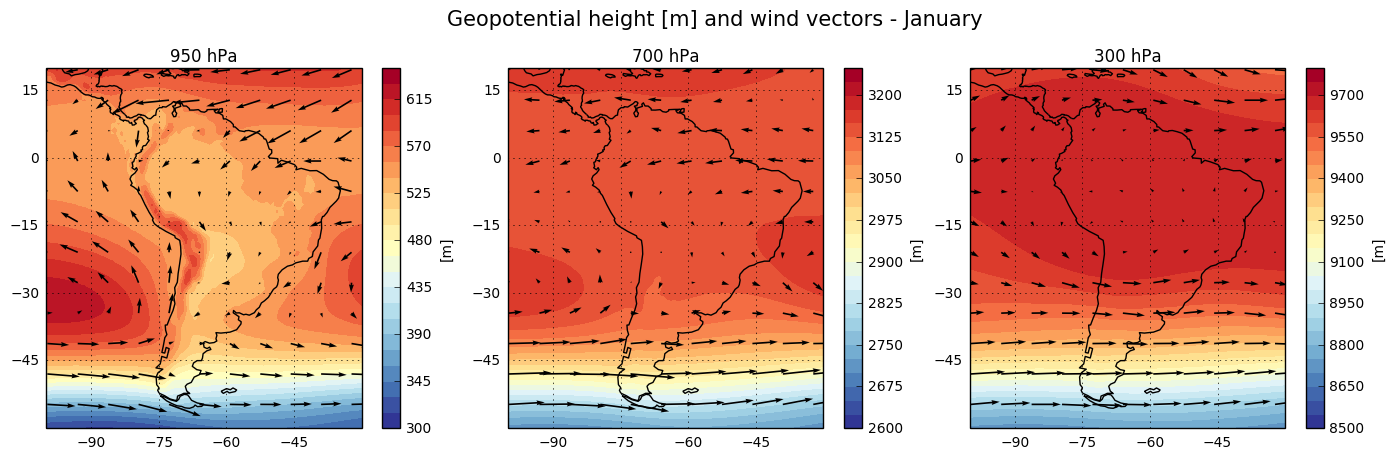

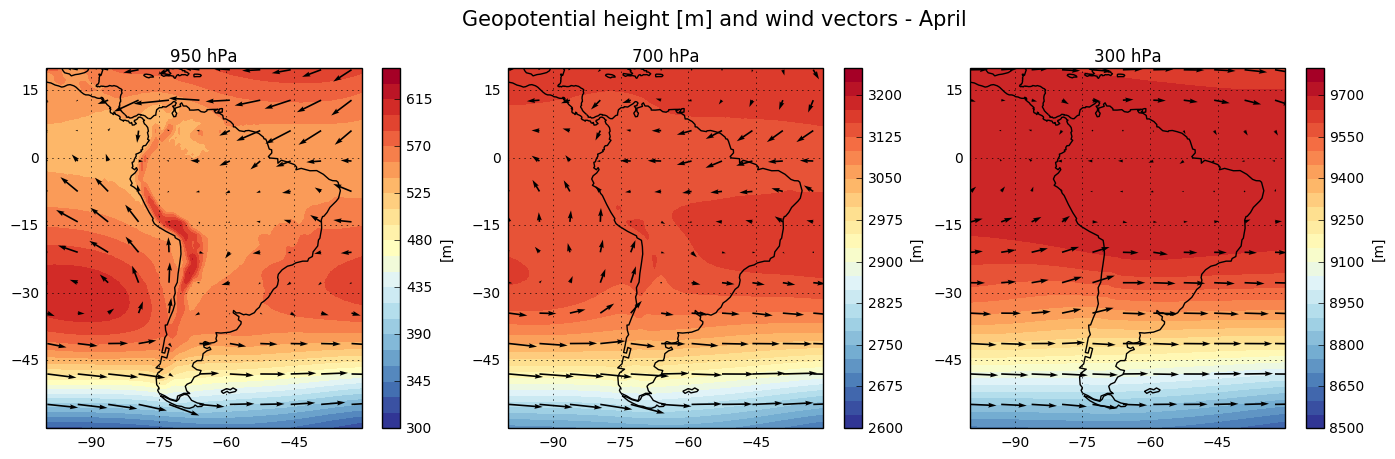

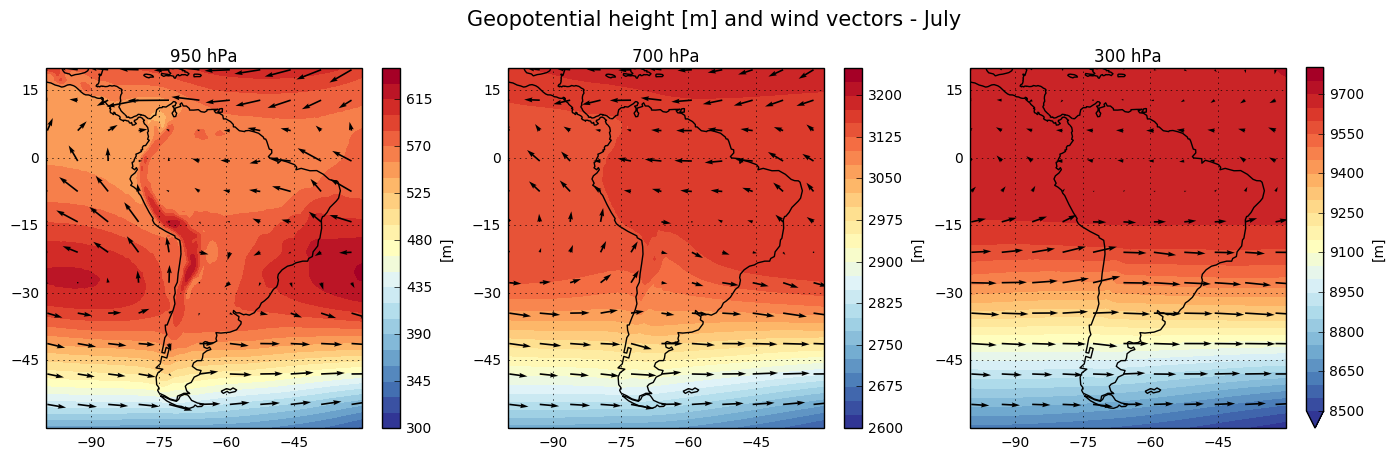

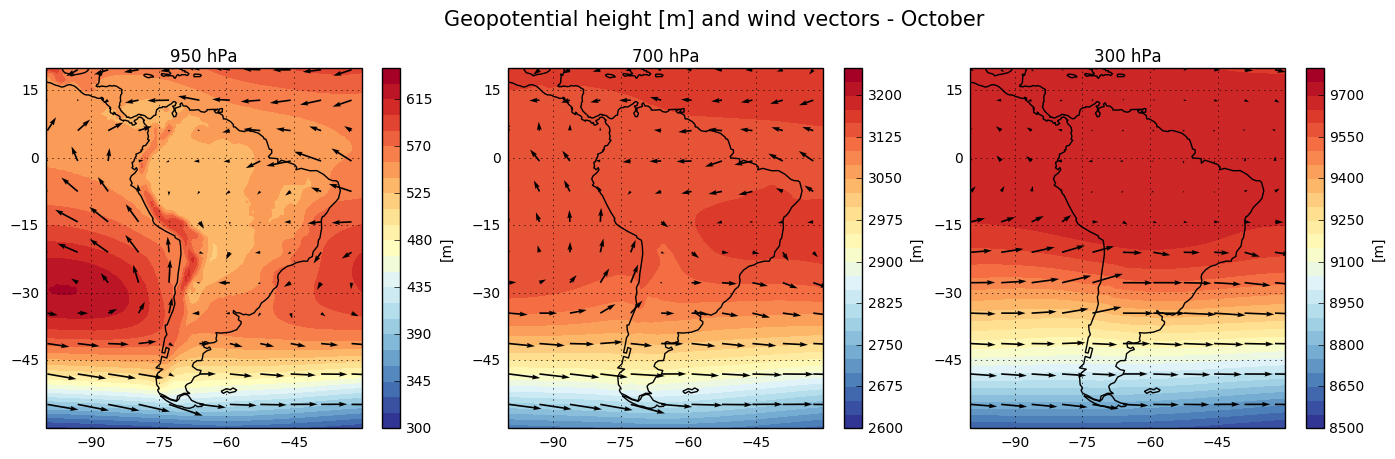

In [13]:
Z = ds.z / 9.81
levels = [950,700,300]                                # change levels as you want!

#January
u_jan_low = ds.u.sel(month=1).sel(level=levels[0])    # vectors for quiver plot at different levels
v_jan_low = ds.v.sel(month=1).sel(level=levels[0])
pu_jan_low, pv_jan_low = u_jan_low[::9,::9], v_jan_low[::9,::9] 

u_jan_mid = ds.u.sel(month=1).sel(level=levels[1])
v_jan_mid = ds.v.sel(month=1).sel(level=levels[1])
pu_jan_mid, pv_jan_mid = u_jan_mid[::9,::9], v_jan_mid[::9,::9] 

u_jan_hi = ds.u.sel(month=1).sel(level=levels[2])
v_jan_hi = ds.v.sel(month=1).sel(level=levels[2])
pu_jan_hi, pv_jan_hi = u_jan_hi[::9,::9], v_jan_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=1).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_low.longitude, pu_jan_low.latitude, pu_jan_low, pv_jan_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=1).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2600,vmax=3250,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_mid.longitude, pu_jan_mid.latitude, pu_jan_mid, pv_jan_mid, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=1).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jan_hi.longitude, pu_jan_hi.latitude, pu_jan_hi, pv_jan_hi, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] and wind vectors - January',fontsize=15)
plt.subplots_adjust(top=0.85)

#April
u_apr_low = ds.u.sel(month=4).sel(level=levels[0])    # vectors for quiver plot at different levels
v_apr_low = ds.v.sel(month=4).sel(level=levels[0])
pu_apr_low, pv_apr_low = u_apr_low[::9,::9], v_apr_low[::9,::9] 

u_apr_mid = ds.u.sel(month=4).sel(level=levels[1])
v_apr_mid = ds.v.sel(month=4).sel(level=levels[1])
pu_apr_mid, pv_apr_mid = u_apr_mid[::9,::9], v_apr_mid[::9,::9] 

u_apr_hi = ds.u.sel(month=4).sel(level=levels[2])
v_apr_hi = ds.v.sel(month=4).sel(level=levels[2])
pu_apr_hi, pv_apr_hi = u_apr_hi[::9,::9], v_apr_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=4).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_apr_low.longitude, pu_apr_low.latitude, pu_apr_low, pv_apr_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=4).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2600,vmax=3250,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_apr_mid.longitude, pu_apr_mid.latitude, pu_apr_mid, pv_apr_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=4).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_apr_hi.longitude, pu_apr_hi.latitude, pu_apr_hi, pv_apr_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] and wind vectors - April',fontsize=15)
plt.subplots_adjust(top=0.85)

#July
u_jul_low = ds.u.sel(month=7).sel(level=levels[0])    # vectors for quiver plot at different levels
v_jul_low = ds.v.sel(month=7).sel(level=levels[0])
pu_jul_low, pv_jul_low = u_jul_low[::9,::9], v_jul_low[::9,::9] 

u_jul_mid = ds.u.sel(month=7).sel(level=levels[1])
v_jul_mid = ds.v.sel(month=7).sel(level=levels[1])
pu_jul_mid, pv_jul_mid = u_jul_mid[::9,::9], v_jul_mid[::9,::9] 

u_jul_hi = ds.u.sel(month=7).sel(level=levels[2])
v_jul_hi = ds.v.sel(month=7).sel(level=levels[2])
pu_jul_hi, pv_jul_hi = u_jul_hi[::9,::9], v_jul_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=7).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_low.longitude, pu_jul_low.latitude, pu_jul_low, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=7).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2600,vmax=3250,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_mid.longitude, pu_jul_mid.latitude, pu_jul_mid, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=7).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_jul_hi.longitude, pu_jul_hi.latitude, pu_jul_hi, pv_jul_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] and wind vectors - July',fontsize=15)
plt.subplots_adjust(top=0.85)

#October
u_oct_low = ds.u.sel(month=10).sel(level=levels[0])    # vectors for quiver plot at different levels
v_oct_low = ds.v.sel(month=10).sel(level=levels[0])
pu_oct_low, pv_oct_low = u_oct_low[::9,::9], v_oct_low[::9,::9] 

u_oct_mid = ds.u.sel(month=10).sel(level=levels[1])
v_oct_mid = ds.v.sel(month=10).sel(level=levels[1])
pu_oct_mid, pv_oct_mid = u_oct_mid[::9,::9], v_oct_mid[::9,::9] 

u_oct_hi = ds.u.sel(month=10).sel(level=levels[2])
v_oct_hi = ds.v.sel(month=10).sel(level=levels[2])
pu_oct_hi, pv_oct_hi = u_oct_hi[::9,::9], v_oct_hi[::9,::9] 


plt.figure(figsize=(14, 4.5))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
im = Z.sel(month=10).sel(level=levels[0]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=300,vmax=640,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_oct_low.longitude, pu_oct_low.latitude, pu_oct_low, pv_oct_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[0]))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
Z.sel(month=10).sel(level=levels[1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=2600,vmax=3250,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_oct_mid.longitude, pu_oct_mid.latitude, pu_oct_mid, pv_oct_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[1]))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
Z.sel(month=10).sel(level=levels[2]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=8500,vmax=9800,levels=30,cmap='RdYlBu_r',cbar_kwargs={'label':'[m]'})
qv = ax.quiver(pu_oct_hi.longitude, pu_oct_hi.latitude, pu_oct_hi, pv_oct_low, transform=ccrs.PlateCarree())
ax.coastlines(); xl = ax.gridlines(draw_labels=True); xl.xlabels_top = False; xl.ylabels_right = False
ax.set_extent(my_extents, crs=ccrs.PlateCarree())
plt.title('%d hPa' % (levels[2]))
plt.tight_layout();
plt.suptitle('Geopotential height [m] and wind vectors - October',fontsize=15)
plt.subplots_adjust(top=0.85)

### 3.2 Atmospheric cross-section

### 3.2.1 Subtropical jet

In [172]:
ds = ncdf.sel(latitude=slice(20, -70))#, longitude=slice(-100, -30))
u_allz_jan = ds.u.sel(month=1).load()
u_allz_jan = u_allz_jan.mean(dim='longitude')
u_allz_jul = ds.u.sel(month=7).load()
u_allz_jul = u_allz_jul.mean(dim='longitude')

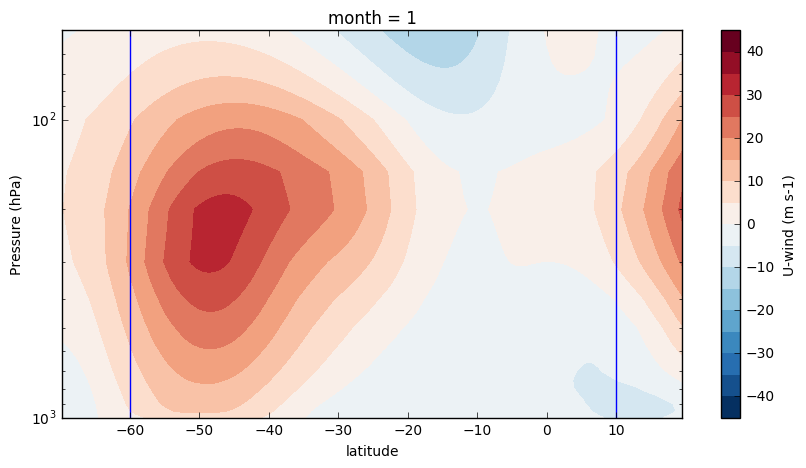

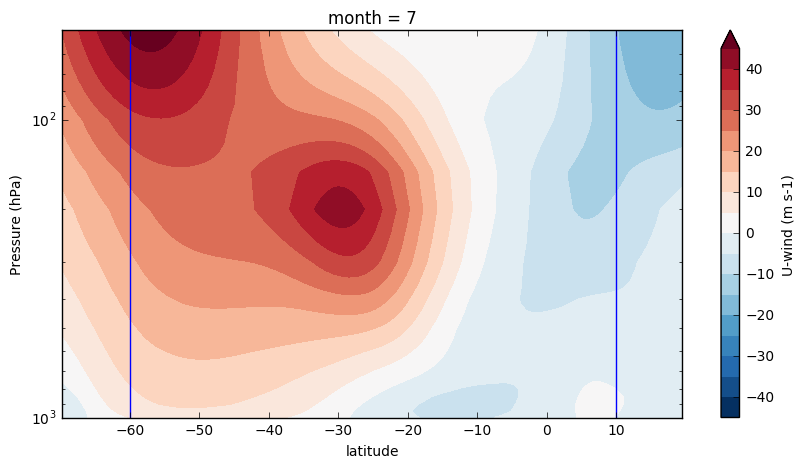

In [174]:
plt.figure(figsize=(10,5))
u_allz_jan.plot.contourf(levels=np.linspace(-45, 45, 19), cbar_kwargs={'label':'U-wind (m s-1)'});
plt.ylim([1000, 50])
plt.yscale('log')
plt.ylabel('Pressure (hPa)');
plt.axvline(-60);
plt.axvline(10);

plt.figure(figsize=(10,5))
u_allz_jul.plot.contourf(levels=np.linspace(-45, 45, 19), cbar_kwargs={'label':'U-wind (m s-1)'});
plt.ylim([1000, 50])
plt.yscale('log')
plt.ylabel('Pressure (hPa)');
plt.axvline(-60);
plt.axvline(10);

### 3.2.2 Zonal cross-section at -10°S to -20°S

The zonal cross-section plot between -10°S to -20°S in January in fig. xx represents averaged vertical and zonal wind vectors from longitude 180°W to 0°, which extends to Pacific and Atlantic ocean, to the left and to the right, respectively. Mean zonal flow is easterly, because it is still in the subtropical latitudes where trade wind dominates the flow. During summer time, the land has higher temperature than the ocean. Thus, the direct thermal circulation can be observed. (Silva & Kousky). In fig. xx, the rising motion of deep convection can be clearly seen over the continent (between the blue vertical lines) and especially strong above the Andes (between the red vertical lines) and the Amazon region. This motion also brings moisture to the continent and causes the precipitation during austral summer, e.g. over Altiplano region where the Andes acts as the orograhic barrier as mentioned in section 2.6. (Garreaud et al., 2003)

In [141]:
dsx = ncdf.sel(latitude=slice(-10, -20), longitude=slice(-180, 0)) #slice for data between -10 and -20, after Silva & Kousky
dsx.u.load();
dsx.w.load();

#u_jan = dsx.u.sel(month = 1).mean(dim='latitude')
u_jan = dsx.u.sel(month = 1).mean(dim='latitude')
w_jan = dsx.w.sel(month = 1).mean(dim='latitude')

weight = (u_jan / u_jan) * np.cos(np.deg2rad(dsx.latitude))
u_jan = weight * u_jan
u_jan = u_jan.mean(dim = 'latitude')
w_jan = weight * w_jan
w_jan = w_jan.mean(dim = 'latitude')*-1

In [142]:
pu, pw = u_jan[:,::7], w_jan[:,::7] 

In [143]:
#divergence
div_xs = np.sum(np.gradient(u_jan),axis=0) + np.sum(np.gradient(w_jan),axis=0)
div_xs = u_jan*0 + div_xs

In [144]:
dx = 1 / (6371000 * np.cos(np.deg2rad(dsx.u.latitude)))
dx

<xarray.DataArray 'latitude' (latitude: 13)>
array([  1.59634322e-07,   1.60036288e-07,   1.60467834e-07,
         1.60929373e-07,   1.61421316e-07,   1.61944107e-07,
         1.62498226e-07,   1.63084192e-07,   1.63702543e-07,
         1.64353876e-07,   1.65038801e-07,   1.65757989e-07,
         1.66512116e-07])
Coordinates:
  * latitude  (latitude) float32 -10.5 -11.25 -12.0 -12.75 -13.5 -14.25 ...

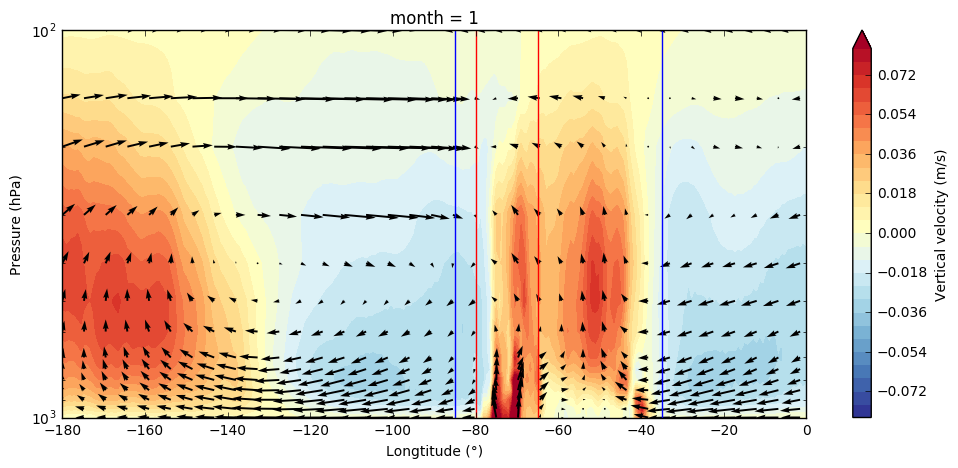

In [157]:
plt.figure(figsize=(12,5))
ax = plt.axes()
#div_xs.plot.contourf(ax=ax, levels=12,vmin=-5,vmax=5,cmap='RdYlBu_r',cbar_kwargs={'label':'Divergence'})
w_jan.plot.contourf(ax=ax, levels=30,vmin=-0.08,vmax=0.08,cmap='RdYlBu_r',cbar_kwargs={'label':'Vertical velocity (m/s)'})
qv = ax.quiver(pu.longitude, pu.level, pu.values, pw.values *50)
ax.set_yscale("log");
ax.set_ylim(1000, 100);
plt.ylabel('Pressure (hPa)');
plt.xlabel('Longtitude (°)');
plt.axvline(-85);
plt.axvline(-35);
plt.axvline(-80,color='r');
plt.axvline(-65,color='r');

#plt.vlines(-60, u_jan.values, u_jan.values, color='r');

## 4. Climate variability

## 5. Climate anomalies during El Nino and La Nina years